In [2]:
import sys
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx 
%matplotlib inline

In [3]:
df_main = pd.read_csv('../../01 Data/03 Consolidated/authors_with_gender_v1.csv')

In [4]:
df_main

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender
0,10.1103/PhysRevApplied.9.039901,2018-03-06,Tomoyuki Sasaki,Tomoyuki,Sasaki,[],tomoyuki,NaN
1,10.1103/PhysRevApplied.9.039901,2018-03-06,Yuichiro Ando,Yuichiro,Ando,[],yuichiro,NaN
2,10.1103/PhysRevApplied.9.039901,2018-03-06,Makoto Kameno,Makoto,Kameno,[],makoto,male
3,10.1103/PhysRevApplied.9.039901,2018-03-06,Takayuki Tahara,Takayuki,Tahara,[],takayuki,male
4,10.1103/PhysRevApplied.9.039901,2018-03-06,Hayato Koike,Hayato,Koike,[],hayato,NaN
...,...,...,...,...,...,...,...,...
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,mikhail,male
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,a,NaN
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,f,NaN
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,a,NaN


In [5]:
df_main.gender.value_counts()

male      384809
female     45281
Name: gender, dtype: int64

In [5]:
# QC
df_main[df_main.name == 'R. V. F. Janssens']

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender
198318,10.1103/PhysRevA.55.2090,1997-03-01,R. V. F. Janssens,R. V. F.,Janssens,a1,r v f,NaN
1418142,10.1103/PhysRevLett.61.2154,1988-10-31,R. V. F. Janssens,R. V. F.,Janssens,a1,r v f,NaN
1419849,10.1103/PhysRevLett.61.46,1988-07-04,R. V. F. Janssens,R. V. F.,Janssens,a1,r v f,NaN
1431255,10.1103/PhysRevLett.59.2856,1987-12-21,R. V. F. Janssens,R. V. F.,Janssens,a1,r v f,NaN
1435492,10.1103/PhysRevLett.92.031101,2004-01-23,R. V. F. Janssens,R. V. F.,Janssens,a1,r v f,NaN
...,...,...,...,...,...,...,...,...
2474467,10.1103/PhysRevC.78.041302,2008-10-10,R. V. F. Janssens,R. V. F.,Janssens,a2,r v f,NaN
2474718,10.1103/PhysRevC.78.017305,2008-07-23,R. V. F. Janssens,R. V. F.,Janssens,a4,r v f,NaN
2474881,10.1103/PhysRevC.78.031302,2008-09-22,R. V. F. Janssens,R. V. F.,Janssens,a5,r v f,NaN
2475012,10.1103/PhysRevC.78.024301,2008-08-06,R. V. F. Janssens,R. V. F.,Janssens,a2,r v f,NaN


In [6]:
df_age = pd.read_csv('../../01 Data/03 Consolidated/uniq_author_gen_pprcount_age_v1')

In [7]:
df_age

,name,gender,age,paper_count
0,A.A. Aczel,male,1,2
1,A.A. Aligia,male,1,1
2,A.A. Hasan,male,1,1
3,A.A. Ioannides,male,1,2
4,A.A. Korneev,male,1,2
...,...,...,...,...
88185,Zygmunt Mazur,male,1,1
88186,Zygmunt Patyk,male,4,4
88187,Zygmunt Zołnierek,male,1,2
88188,the ASDEX Upgrade Team,male,1,1


In [8]:
df_age.gender.value_counts()

male      76868
female    11322
Name: gender, dtype: int64

In [9]:
print('Females: Avg age of female authors: {0:0.2f} years'.format(np.mean(df_age[df_age.gender=='female']['age'])))
print('Males: Avg age of male authors: {0:0.2f} years'.format(np.mean(df_age[df_age.gender=='male']['age'])))

Females: Avg age of female authors: 4.18 years
Males: Avg age of male authors: 5.48 years


In [10]:
print('Females: Avg publication count of female authors: {0:0.2f} papers'.format(np.mean(df_age[df_age.gender=='female']['paper_count'])))
print('Males: Avg publication count of male authors: {0:0.2f} papers'.format(np.mean(df_age[df_age.gender=='male']['paper_count'])))

Females: Avg publication count of female authors: 4.00 papers
Males: Avg publication count of male authors: 5.01 papers


### Popularity Hypothesis
1. Female/Male collab with junior scientists
2. Female/Male colab with less/more popular colaborators in terms their number of colaborators
3. Female/Male colab with less/more popular colaborators in terms of papers published by each

### Popularity analysis can be done on data with no gender info for authors
### But since other analyses like collaborators one is done on only those papers which has gender info for all authors (~9% of data), we modify this data as well

#### Also since we calculated age and paper_count for authors with gender data, we have to keep only those paper_ids

#### Processing main data to get reqd level
Source: number of collaborators analysis v1

In [11]:
df_main['gen_count'] = df_main['gender'].apply(lambda x: 1 if x == 'male' or x == 'female' else 0)

In [12]:
df_gen = df_main.groupby(['paper_id']).agg({'name': 'count', 'gen_count': 'sum'}).reset_index()

In [13]:
# Drop those papers for which number of authors != number of genders available
df_gen = df_gen.drop(df_gen[df_gen.name != df_gen.gen_count].index)

In [14]:
# df_gen

In [15]:
# Make a list of paper ids which satisfy condition to filter main data
uniq_id_list = list(df_gen.paper_id)

In [16]:
# Fileter out main data for those papers for which we gender info for all the authors
df_gender = df_main[df_main['paper_id'].isin(uniq_id_list)]

In [17]:
# QC: No nan values present in gender
len(df_gender.gender) == len(df_gender[df_gender.gender == 'male']) + len(df_gender[df_gender.gender == 'female'])

True

In [18]:
print('% of data kept is: {0:0.1%}'.format(len(set(df_gender.paper_id))/len(set(df_main.paper_id))))

% of data kept is: 8.8%


###### Drop duplicacy at affilation level

In [19]:
df = df_gender.drop_duplicates(['paper_id','name','gender'], keep='first')

In [20]:
df

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count
69,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,Roman,Verba,a1,roman,male,1
70,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a2,ivan,male,1
72,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,Ilya,Krivorotov,a4,ilya,male,1
73,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,Vasil,Tiberkevich,a5,vasil,male,1
74,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,Andrei,Slavin,a5,andrei,male,1
...,...,...,...,...,...,...,...,...,...
2503634,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,Roberto,Corsini,a2,roberto,male,1
2503835,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,Dmitry,Shatilov,a1,dmitry,male,1
2503836,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,Eugene,Levichev,a1,eugene,male,1
2503837,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,Evgeny,Simonov,a1,evgeny,male,1


In [21]:
# df.to_csv('../../01 Data/03 Consolidated/maindf_gender_allauthors_noaffil_duplicacy_v1.csv', index=False)

In [22]:
# Pre-processing complete

### Analysis DB prep

In [23]:
df_mrg = pd.merge(df, df_age, how='left', on=['name', 'gender'])

In [24]:
df_mrg

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,gen_count,age,paper_count
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,Roman,Verba,a1,roman,male,1,7,6
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,Ivan,Lisenkov,a2,ivan,male,1,5,11
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,Ilya,Krivorotov,a4,ilya,male,1,6,4
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,Vasil,Tiberkevich,a5,vasil,male,1,16,24
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,Andrei,Slavin,a5,andrei,male,1,14,21
...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,Roberto,Corsini,a2,roberto,male,1,8,2
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,Dmitry,Shatilov,a1,dmitry,male,1,5,3
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,Eugene,Levichev,a1,eugene,male,1,1,1
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,Evgeny,Simonov,a1,evgeny,male,1,1,1


In [25]:
df_mrg = df_mrg[['paper_id', 'date', 'name', 'gender', 'gen_count', 'age', 'paper_count']]

In [26]:
df_mrg

,paper_id,date,name,gender,gen_count,age,paper_count
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21
...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1


In [27]:
df_mrg['m_colab'] = df_mrg['gender'].apply(lambda x: 1 if x == 'male' else 0)
df_mrg['f_colab'] = df_mrg['gender'].apply(lambda x: 1 if x == 'female' else 0)

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df_mrg

,paper_id,date,name,gender,gen_count,age,paper_count,m_colab,f_colab
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0
...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0


#### Rollup data at paper_id level, so we get total age of authors on a paper, and total number of papers written by authors on that paper_id

In [29]:
df_ppr_age = df_mrg.groupby(['paper_id'], as_index=False).agg({'age':'sum', 'paper_count':'sum', 'name':'count',
                                                               'm_colab':'sum','f_colab':'sum'})

In [30]:
df_ppr_age

,paper_id,age,paper_count,name,m_colab,f_colab
0,10.1103/PhysRev.1.124,14,2,1,1,0
1,10.1103/PhysRev.1.211,26,19,1,1,0
2,10.1103/PhysRev.1.446,26,19,1,1,0
3,10.1103/PhysRev.1.56,13,5,1,1,0
4,10.1103/PhysRev.10.1,35,27,1,1,0
...,...,...,...,...,...,...
55023,10.1103/RevModPhys.90.035001,15,9,2,2,0
55024,10.1103/RevModPhys.90.035007,12,7,1,1,0
55025,10.1103/RevModPhys.90.040501,56,11,1,1,0
55026,10.1103/RevModPhys.90.045001,17,21,2,1,1


In [31]:
df_ppr_age[df_ppr_age.paper_id == '10.1103/PhysRevApplied.9.064014']

,paper_id,age,paper_count,name,m_colab,f_colab
11429,10.1103/PhysRevApplied.9.064014,48,66,5,5,0


#### Bring totals against main data which is at pepr_id-Name levl

In [32]:
df_res = pd.merge(df_mrg,df_ppr_age,how='left',on=['paper_id'])

In [33]:
df_res

,paper_id,date,name_x,gender,gen_count,age_x,paper_count_x,m_colab_x,f_colab_x,age_y,paper_count_y,name_y,m_colab_y,f_colab_y
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,66,5,5,0
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,66,5,5,0
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,66,5,5,0
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,66,5,5,0
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,66,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,21,5,4,1
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,9,4,4,0
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,9,4,4,0
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,9,4,4,0


#### Popularity Analysis: Columns prep

In [34]:
# Will be used as divisor (tota_paper/total_authors, total_age/total_authors)
df_res['colab_auth_count'] = df_res['name_y'] - 1

In [35]:
# Total age of collaborators of a per_id
df_res['colab_age'] = df_res['age_y'] - df_res['age_x']

In [36]:
df_res

,paper_id,date,name_x,gender,gen_count,age_x,paper_count_x,m_colab_x,f_colab_x,age_y,paper_count_y,name_y,m_colab_y,f_colab_y,colab_auth_count,colab_age
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,66,5,5,0,4,41
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,66,5,5,0,4,43
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,66,5,5,0,4,42
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,66,5,5,0,4,32
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,66,5,5,0,4,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,21,5,4,1,4,27
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,9,4,4,0,3,11
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,9,4,4,0,3,15
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,9,4,4,0,3,15


In [37]:
df_res['avg_colab_age'] = df_res['colab_age']/df_res['colab_auth_count']

In [38]:
df_res

,paper_id,date,name_x,gender,gen_count,age_x,paper_count_x,m_colab_x,f_colab_x,age_y,paper_count_y,name_y,m_colab_y,f_colab_y,colab_auth_count,colab_age,avg_colab_age
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,66,5,5,0,4,41,10.250000
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,66,5,5,0,4,43,10.750000
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,66,5,5,0,4,42,10.500000
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,66,5,5,0,4,32,8.000000
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,66,5,5,0,4,34,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,21,5,4,1,4,27,6.750000
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,9,4,4,0,3,11,3.666667
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,9,4,4,0,3,15,5.000000
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,9,4,4,0,3,15,5.000000


###### Popularity Analysis: Age of colaborators

In [39]:
print('Females: Avg age of female author collaborators: {0:0.1f} years'.format(sum(df_res[df_res.gender=='female']['colab_age'])/sum(df_res[df_res.gender=='female']['colab_auth_count'])))
print('Males: Avg age of male author collaborators: {0:0.1f} years'.format(sum(df_res[df_res.gender=='male']['colab_age'])/sum(df_res[df_res.gender=='male']['colab_auth_count'])))

Females: Avg age of female author collaborators: 14.0 years
Males: Avg age of male author collaborators: 14.2 years


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173]), <a list of 174 T

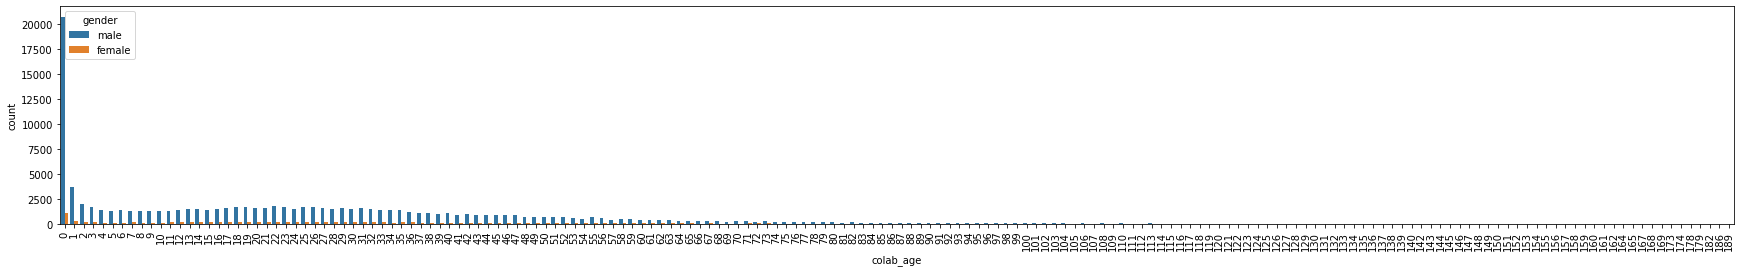

In [40]:
plt.figure(figsize=(30,4))
sns.countplot(df_res.colab_age, hue=df_res.gender)
plt.xticks(rotation=90)

###### Popularity Analysis: Colaborators paper count

In [41]:
df_res['colab_ppr_count'] = df_res['paper_count_y'] - df_res['paper_count_x']
df_res['avg_colab_ppr_count'] = df_res['colab_ppr_count']/df_res['colab_auth_count']

In [42]:
# plt.figure(figsize=(30,4))
# sns.countplot(df_res.colab_ppr_count, hue=df_res.gender)
# plt.xticks(rotation=90)

In [43]:
df_res

,paper_id,date,name_x,gender,gen_count,age_x,paper_count_x,m_colab_x,f_colab_x,age_y,paper_count_y,name_y,m_colab_y,f_colab_y,colab_auth_count,colab_age,avg_colab_age,colab_ppr_count,avg_colab_ppr_count
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,66,5,5,0,4,41,10.250000,60,15.000000
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,66,5,5,0,4,43,10.750000,55,13.750000
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,66,5,5,0,4,42,10.500000,62,15.500000
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,66,5,5,0,4,32,8.000000,42,10.500000
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,66,5,5,0,4,34,8.500000,45,11.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,21,5,4,1,4,27,6.750000,19,4.750000
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,9,4,4,0,3,11,3.666667,6,2.000000
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,9,4,4,0,3,15,5.000000,8,2.666667
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,9,4,4,0,3,15,5.000000,8,2.666667


### Quick Recap
 Recap and previous results comparison before movinng on

In [44]:
# New
print('Females: Avg papers published by female author collaborators: {0:0.1f} papers'.format(sum(df_res[df_res.gender=='female']['colab_ppr_count'])/sum(df_res[df_res.gender=='female']['colab_auth_count'])))
print('Males: Avg papers published by male author collaborators: {0:0.1f} papers'.format(sum(df_res[df_res.gender=='male']['colab_ppr_count'])/sum(df_res[df_res.gender=='male']['colab_auth_count'])))

Females: Avg papers published by female author collaborators: 26.6 papers
Males: Avg papers published by male author collaborators: 26.1 papers


In [45]:
# New
print('Females: Avg number of collaborators: {0:0.1f} authors'.format(sum(df_res[df_res.gender=='female']['colab_auth_count'])/(df_res[df_res.gender=='female']['colab_auth_count'].shape[0])))
print('Males: Avg number of collaborators: {0:0.1f} authors'.format(sum(df_res[df_res.gender=='male']['colab_auth_count'])/(df_res[df_res.gender=='male']['colab_auth_count'].shape[0])))

Females: Avg number of collaborators: 1.9 authors
Males: Avg number of collaborators: 1.6 authors


In [53]:
# New
print('Females: Avg age of female authors: {0:0.1f} years'.format(np.mean(df_map[df_map.gender=='female']['age_x'])))
print('Males: Avg age of male authors: {0:0.1f} years'.format(np.mean(df_map[df_map.gender=='male']['age_x'])))

Females: Avg age of female authors: 6.7 years
Males: Avg age of male authors: 8.6 years


In [49]:
# Old Values (at only name level, no filter for all colab gender present)
print('Females: Avg age of female authors: {0:0.1f} years'.format(np.mean(df_age[df_age.gender=='female']['age'])))
print('Males: Avg age of male authors: {0:0.1f} years'.format(np.mean(df_age[df_age.gender=='male']['age'])))

Females: Avg age of female authors: 4.2 years
Males: Avg age of male authors: 5.5 years


In [54]:
# New
print('Females: Avg publication count of female authors: {0:0.1f} papers'.format(np.mean(df_map[df_map.gender=='female']['paper_count_x'])))
print('Males: Avg publication count of male authors: {0:0.1f} papers'.format(np.mean(df_map[df_map.gender=='male']['paper_count_x'])))

Females: Avg publication count of female authors: 7.1 papers
Males: Avg publication count of male authors: 8.4 papers


In [51]:
# Old Values (at only name level, no filter for all colab gender present)
print('Females: Avg publication count of female authors: {0:0.1f} papers'.format(np.mean(df_age[df_age.gender=='female']['paper_count'])))
print('Males: Avg publication count of male authors: {0:0.1f} papers'.format(np.mean(df_age[df_age.gender=='male']['paper_count'])))

Females: Avg publication count of female authors: 4.0 papers
Males: Avg publication count of male authors: 5.0 papers


In [52]:
print('Females: Avg number of collaborators: {0:0.1f} authors'.format(np.mean(df_map[df_map.gender=='female']['colab_auth_count'])))
print('Males:  Avg number of collaborators: {0:0.1f} authors'.format(np.mean(df_map[df_map.gender=='male']['colab_auth_count'])))

Females: Avg number of collaborators: 4.6 authors
Males:  Avg number of collaborators: 5.2 authors


---- Recap Over

###### Popularity Analysis: Colaborators colaboration count
1. Roll up data at author name gender level
2. Get lifetime total colaboration value against each author
3. Create mapping and bring against original

In [46]:
df_map = df_res.groupby(['name_x','gender', 'age_x', 'paper_count_x'], as_index=False).agg({'colab_auth_count':'sum'})

In [63]:
df_map['tot_coauthors'] = df_map['colab_auth_count']

In [64]:
df_map

,name_x,gender,age_x,paper_count_x,colab_auth_count,tot_coauthors
0,A.E. Domínguez,female,1,1,1,1
1,A.J. Fedro,male,1,2,2,2
2,A.J.M. Medved,male,1,1,0,0
3,A.M. Fedotov,male,1,1,4,4
4,A.N. Omelyanchouk,female,1,1,2,2
...,...,...,...,...,...,...
35999,Zvonimir Vlah,male,5,15,5,5
36000,Zygmunt Bak,male,1,1,0,0
36001,Zygmunt Henkie,male,14,3,5,5
36002,Zygmunt Lalak,male,28,10,2,2


#### To get collaboratos' number of collaborators
1. Get total collab count at paper_id level, which is rollup at paper_id level
2. Again bring that against the. main data
3. Subtract the original authors total collaborators from the paper_id level collab count
4. Take mean

In [65]:
df_res = pd.merge(df_res, df_map, how='left', on=['name_x'])

In [66]:
df_res

,paper_id,date,name_x,gender_x,gen_count,age_x_x,paper_count_x_x,m_colab_x,f_colab_x,age_y,...,avg_colab_ppr_count,gender_y,age_x_y,paper_count_x_y,colab_auth_count_y,gender,age_x,paper_count_x,colab_auth_count,tot_coauthors
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,...,15.000000,male,7,6,20,male,7,6,20,20
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,...,13.750000,male,5,11,13,male,5,11,13,13
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,...,15.500000,male,6,4,12,male,6,4,12,12
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,...,10.500000,male,16,24,42,male,16,24,42,42
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,...,11.250000,male,14,21,51,male,14,21,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,...,4.750000,male,8,2,8,male,8,2,8,8
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,...,2.000000,male,5,3,3,male,5,3,3,3
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,...,2.666667,male,1,1,3,male,1,1,3,3
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,...,2.666667,male,1,1,3,male,1,1,3,3


In [67]:
# Rollup at paper_id level
df_ppr_CC = df_res.groupby(['paper_id'], as_index=False).agg({'tot_coauthors':'sum'})

In [68]:
df_ppr_CC

,paper_id,tot_coauthors
0,10.1103/PhysRev.1.124,0
1,10.1103/PhysRev.1.211,0
2,10.1103/PhysRev.1.446,0
3,10.1103/PhysRev.1.56,0
4,10.1103/PhysRev.10.1,4
...,...,...
55023,10.1103/RevModPhys.90.035001,2
55024,10.1103/RevModPhys.90.035007,1
55025,10.1103/RevModPhys.90.040501,2
55026,10.1103/RevModPhys.90.045001,8


In [71]:
# QC
# df_res[df_res.paper_id == '10.1103/PhysRev.1.56']

In [72]:
# Bring total against main data
df_res = pd.merge(df_res, df_ppr_CC, how='left', on=['paper_id'])

In [73]:
df_res

,paper_id,date,name_x,gender_x,gen_count,age_x_x,paper_count_x_x,m_colab_x,f_colab_x,age_y,...,gender_y,age_x_y,paper_count_x_y,colab_auth_count_y,gender,age_x,paper_count_x,colab_auth_count,tot_coauthors_x,tot_coauthors_y
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,...,male,7,6,20,male,7,6,20,20,138
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,...,male,5,11,13,male,5,11,13,13,138
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,...,male,6,4,12,male,6,4,12,12,138
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,...,male,16,24,42,male,16,24,42,42,138
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,...,male,14,21,51,male,14,21,51,51,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,...,male,8,2,8,male,8,2,8,8,59
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,...,male,5,3,3,male,5,3,3,3,24
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,...,male,1,1,3,male,1,1,3,3,24
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,...,male,1,1,3,male,1,1,3,3,24


In [74]:
df_res['author_lifetime_coauthors'] = df_res['tot_coauthors_y'] - df_res['tot_coauthors_x']

In [77]:
df_res

,paper_id,date,name_x,gender_x,gen_count,age_x_x,paper_count_x_x,m_colab_x,f_colab_x,age_y,...,age_x_y,paper_count_x_y,colab_auth_count_y,gender,age_x,paper_count_x,colab_auth_count,tot_coauthors_x,tot_coauthors_y,author_lifetime_coauthors
0,10.1103/PhysRevApplied.9.064014,2018-06-12,Roman Verba,male,1,7,6,1,0,48,...,7,6,20,male,7,6,20,20,138,118
1,10.1103/PhysRevApplied.9.064014,2018-06-12,Ivan Lisenkov,male,1,5,11,1,0,48,...,5,11,13,male,5,11,13,13,138,125
2,10.1103/PhysRevApplied.9.064014,2018-06-12,Ilya Krivorotov,male,1,6,4,1,0,48,...,6,4,12,male,6,4,12,12,138,126
3,10.1103/PhysRevApplied.9.064014,2018-06-12,Vasil Tiberkevich,male,1,16,24,1,0,48,...,16,24,42,male,16,24,42,42,138,96
4,10.1103/PhysRevApplied.9.064014,2018-06-12,Andrei Slavin,male,1,14,21,1,0,48,...,14,21,51,male,14,21,51,51,138,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110688,10.1103/PhysRevSTAB.14.022001,2011-02-07,Roberto Corsini,male,1,8,2,1,0,35,...,8,2,8,male,8,2,8,8,59,51
110689,10.1103/PhysRevSTAB.14.014001,2011-01-21,Dmitry Shatilov,male,1,5,3,1,0,16,...,5,3,3,male,5,3,3,3,24,21
110690,10.1103/PhysRevSTAB.14.014001,2011-01-21,Eugene Levichev,male,1,1,1,1,0,16,...,1,1,3,male,1,1,3,3,24,21
110691,10.1103/PhysRevSTAB.14.014001,2011-01-21,Evgeny Simonov,male,1,1,1,1,0,16,...,1,1,3,male,1,1,3,3,24,21


In [76]:
print('Females: Avg total-lifetime-collaborators of female author co-authors: {0:0.1f} authors'.format(sum(df_res[df_res.gender=='female']['author_lifetime_coauthors'])/(df_res[df_res.gender=='female']['author_lifetime_coauthors'].shape[0])))
print('Males: Avg total-lifetime-collaborators of male author co-authors: {0:0.1f} authors'.format(sum(df_res[df_res.gender=='male']['author_lifetime_coauthors'])/(df_res[df_res.gender=='male']['author_lifetime_coauthors'].shape[0])))

Females: Avg total-lifetime-collaborators of female author co-authors: 36.5 authors
Males: Avg total-lifetime-collaborators of male author co-authors: 31.0 authors
